<a href="https://colab.research.google.com/github/rummankhan19/Basic-Portfolio/blob/main/Wildfire_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("/content/merged_weather_fire_data_org.csv")
data = data.sample(n=200000, random_state=42)
data.drop('daynight', axis=1, inplace = True)
print(data.head())
merged_data_optimized = data


        latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
218503    20.692     83.298      335.37  0.52   0.50  2013-03-12       708   
275932    20.200     82.303      331.14  0.48   0.40  2014-02-26       731   
190890    20.179     82.000      351.21  0.40   0.44  2013-04-07       720   
263201    20.324     82.219      339.17  0.42   0.61  2013-03-24       823   
54008     15.040     74.179      350.14  0.48   0.48  2013-04-16       751   

       satellite instrument confidence  ...  Longitude  Latitude  Elevation  \
218503         N      VIIRS          l  ...     83.125   20.4510        236   
275932         N      VIIRS          l  ...     82.500   20.4510        797   
190890         N      VIIRS          n  ...     81.875   20.4510        419   
263201         N      VIIRS          n  ...     82.500   20.4510        797   
54008          N      VIIRS          n  ...     74.375   14.8309        585   

        Max Temperature  Min Temperature Precipitation  

In [ ]:
data['Fire_Binary'] = np.where((data['bright_ti4'] > 300) & (data['confidence'] == 'h'), 1, 0)
data['FRP_Target'] = data['frp']

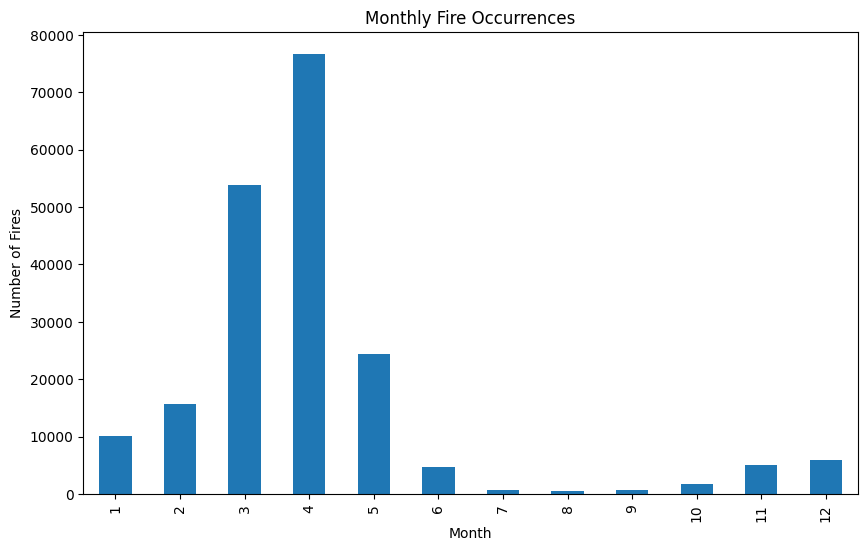

In [ ]:
# Group by month to observe seasonal trends
merged_data_optimized['Date'] = pd.to_datetime(data['Date'], errors='coerce')
merged_data_optimized['Month'] = merged_data_optimized['Date'].dt.month
monthly_fire_trend = merged_data_optimized.groupby('Month').size()

plt.figure(figsize=(10, 6))
monthly_fire_trend.plot(kind='bar')
plt.title('Monthly Fire Occurrences')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.show()

# Converts 'Date' to datetime format, extracts month, groups data by month to find fire occurrence trends, and plots the monthly fire occurrences as a bar chart.

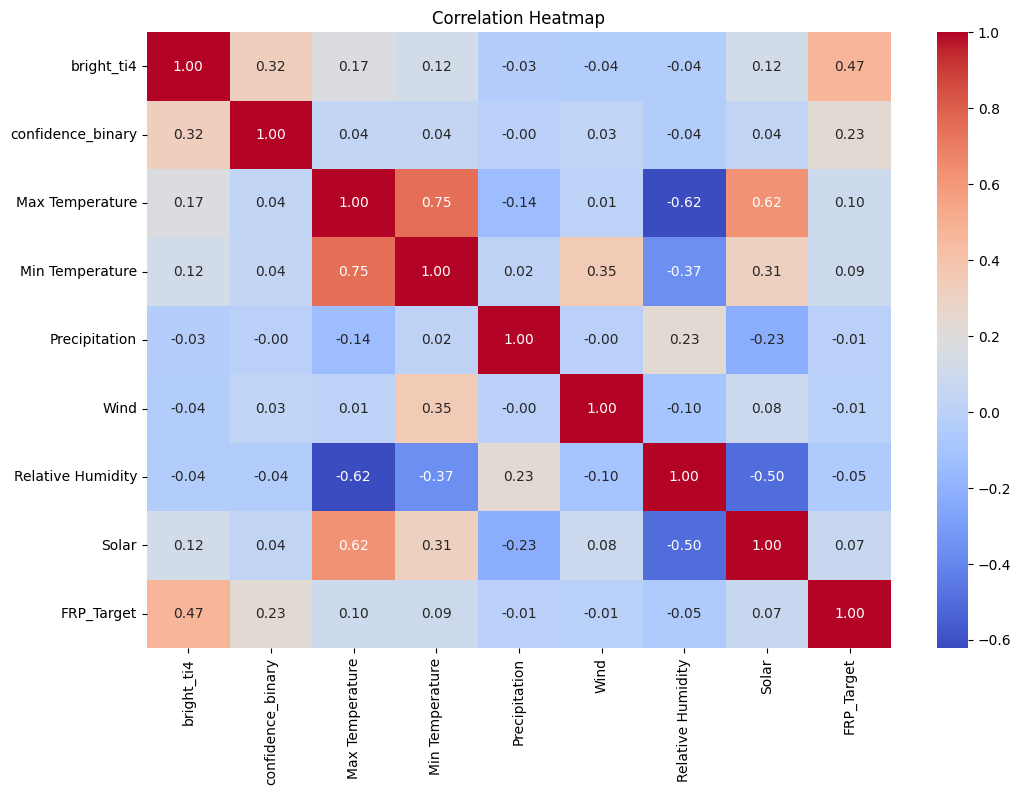

In [ ]:
plt.figure(figsize=(12, 8))
data['confidence_binary'] = data['confidence'].apply(lambda x: 1 if x == 'h' else 0)
correlation_matrix = data[['bright_ti4', 'confidence_binary', 'Max Temperature', 'Min Temperature',
                           'Precipitation', 'Wind', 'Relative Humidity', 'Solar', 'FRP_Target']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


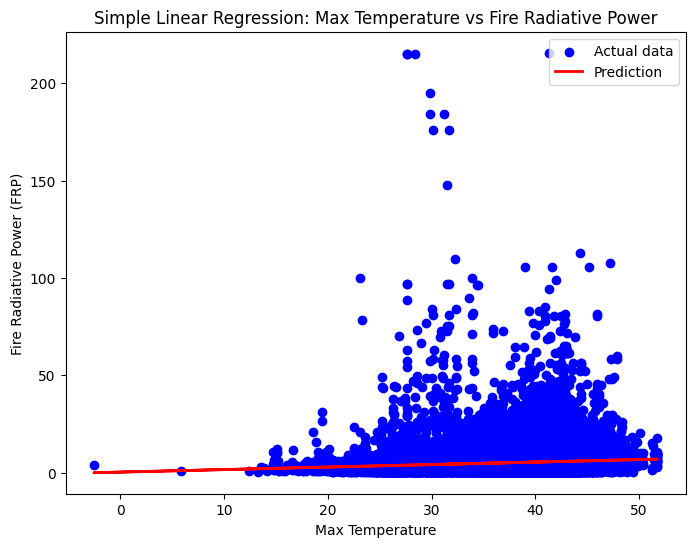

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = merged_data_optimized[['Max Temperature']].values.reshape(-1, 1)
y = merged_data_optimized['frp'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, model.predict(X_test), color='red', linewidth=2, label='Prediction')
plt.title('Simple Linear Regression: Max Temperature vs Fire Radiative Power')
plt.xlabel('Max Temperature')
plt.ylabel('Fire Radiative Power (FRP)')
plt.legend()
plt.show()

# Prepares the data, splits it into training and testing sets, fits a linear regression model to predict Fire Radiative Power from Max Temperature, and plots the results.

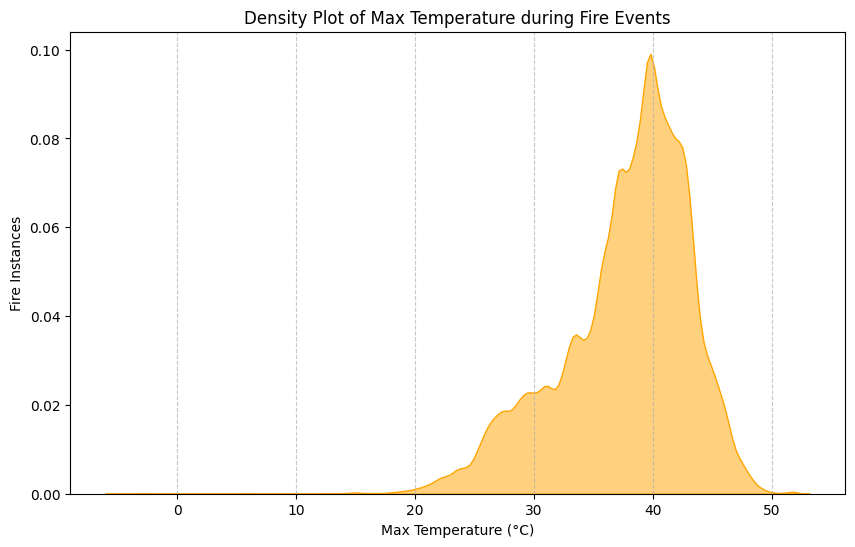

In [ ]:
merged_data_optimized['Max Temperature'] = pd.to_numeric(merged_data_optimized['Max Temperature'], errors='coerce')
merged_data_cleaned = merged_data_optimized.dropna(subset=['Max Temperature'])

plt.figure(figsize=(10, 6))
sns.kdeplot(data=merged_data_cleaned, x='Max Temperature', fill=True, color='orange', alpha=0.5)
plt.title('Density Plot of Max Temperature during Fire Events')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Fire Instances')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Converts 'Max Temperature' to numeric, drops rows with missing values, and creates a density plot to visualize the distribution of Max Temperature during fire events.

In [ ]:
import plotly.express as px

fig = px.scatter_geo(
    merged_data_optimized,
    lat='Latitude',
    lon='Longitude',
    color='frp',
    animation_frame='acq_date',
    title='Fire Occurrences Over Time in India',
    color_continuous_scale='YlOrRd'
)
fig.show()

# Creates an interactive geo scatter plot to visualize fire occurrences over time in India, using latitude and longitude for map points and animating by acquisition date.

In [ ]:
Q1 = data['frp'].quantile(0.25)
Q3 = data['frp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['frp'] >= lower_bound) & (data['frp'] <= upper_bound)]

data.shape[0]

187455

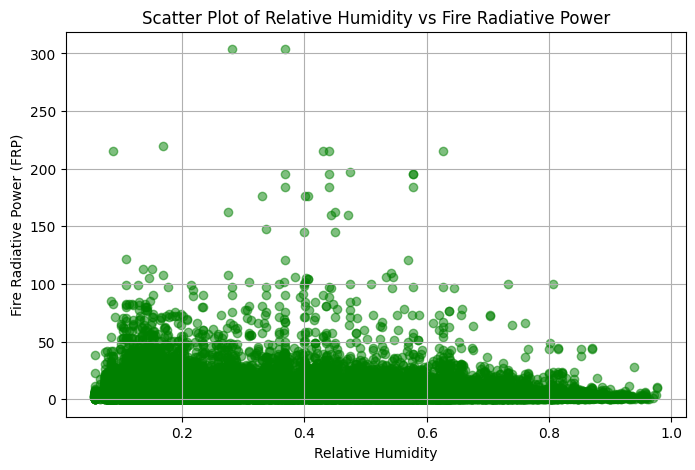

In [ ]:
sampled_data_min = merged_data_optimized.sample(n=100000, random_state=42)

plt.figure(figsize=(8, 5))
plt.scatter(sampled_data_min['Relative Humidity'], sampled_data_min['frp'], alpha=0.5, color='green')
plt.title('Scatter Plot of Relative Humidity vs Fire Radiative Power')
plt.xlabel('Relative Humidity')
plt.ylabel('Fire Radiative Power (FRP)')
plt.grid(True)
plt.show()


In [ ]:
data.head()

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
218503    20.692     83.298      335.37  0.52   0.50  2013-03-12       708   
275932    20.200     82.303      331.14  0.48   0.40  2014-02-26       731   
190890    20.179     82.000      351.21  0.40   0.44  2013-04-07       720   
263201    20.324     82.219      339.17  0.42   0.61  2013-03-24       823   
54008     15.040     74.179      350.14  0.48   0.48  2013-04-16       751   

       satellite instrument confidence  ...  Min Temperature  Precipitation  \
218503         N      VIIRS          l  ...           18.452       0.001717   
275932         N      VIIRS          l  ...           15.157       0.000000   
190890         N      VIIRS          n  ...           15.543       0.000000   
263201         N      VIIRS          n  ...           22.158       0.000000   
54008          N      VIIRS          n  ...           20.135       0.000000   

            Wind  Relative Humidity      Solar Unnamed: 10  Fire_Binary  \
218503  1.647446           0.291376  23.645230         NaN            0   
275932  1.549550           0.351113  22.247968         NaN            0   
190890  1.671126           0.209826  26.749915         NaN            0   
263201  1.838261           0.328472  16.823684         NaN            0   
54008   2.250390           0.659562  27.116401         NaN            0   

        FRP_Target  Month  confidence_binary  
218503        2.69      3                  0  
275932        4.33      2                  0  
190890        6.83      4                  0  
263201        4.33      3                  0  
54008        10.46      4                  0  

[5 rows x 30 columns]

In [ ]:
features = ['Max Temperature', 'Min Temperature',
            'Precipitation', 'Wind', 'Relative Humidity', 'Solar']
X = data[features]
y_classification = data['Fire_Binary']
y_regression = data['FRP_Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_classification, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Splits the data into training and test sets, trains a Random Forest classifier on the training data, makes predictions on the test data, and evaluates the model's performance using accuracy and classification metrics.

Classification Accuracy: 0.9834626977141181
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     36886
           1       0.00      0.00      0.00       605

    accuracy                           0.98     37491
   macro avg       0.49      0.50      0.50     37491
weighted avg       0.97      0.98      0.98     37491



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_regression, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))


Mean Absolute Error (MAE): 2.1142023076340952
Mean Squared Error (MSE): 7.3989537667028635


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import roc_auc_score


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)

#Logistic Regression
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train)
y_pred_log = log_clf.predict(X_test)
log_auc = roc_auc_score(y_test, y_pred_log)

# SVM
svm_clf = SVC(kernel='rbf', probability=True)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
svm_auc = roc_auc_score(y_test, y_pred_svm)

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
gb_auc = roc_auc_score(y_test, y_pred_gb)

# Random Forest (already tested)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_auc = roc_auc_score(y_test, y_pred_rf)

# XGBoost
xgb_clf = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
xgb_auc = roc_auc_score(y_test, y_pred_xgb)

# Print AUC scores
print("Logistic Regression AUC:", log_auc)
print("SVM AUC:", svm_auc)
print("Gradient Boosting AUC:", gb_auc)
print("Random Forest AUC:", rf_auc)
print("XGBoost AUC:", xgb_auc)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[19:37:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Logistic Regression AUC: 0.5
SVM AUC: 0.5
Gradient Boosting AUC: 0.5
Random Forest AUC: 0.4997966708236187
XGBoost AUC: 0.5


In [ ]:
# Split Data for Regression
X_train, X_test, y_train, y_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
print("Gradient Boosting MAE:", mean_absolute_error(y_test, y_pred_gb))

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))

# XGBoost Regressor
xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))


Gradient Boosting MAE: 2.1923506465414198
Random Forest MAE: 2.114378540905251
XGBoost MAE: 2.1299083933604255


FWI: Comprehensive fire risk assessment based on multiple meteorological factors.
KBDI: Focuses on soil moisture, indicating drought and fire potential in forest floors.
FFDI: Used primarily in Australia for assessing forest fire danger based on weather conditions.
MDF: A modified version of KBDI, adjusted for vegetation-specific conditions to predict fire risk.

In [ ]:
def calculate_fwi(df):
    df['FWI'] = 0.1 * (df['Max Temperature'] - df['Relative Humidity']) * df['Wind'] / (df['Precipitation'] + 1)
    return df
def calculate_kbdi(df):
    df['KBDI'] = (0.01 * (df['Max Temperature'] - 8)) * (100 - df['Relative Humidity']) / (df['Precipitation'] + 1)
    return df
def calculate_ffdi(df, drought_factor=10):
    df['FFDI'] = 2 * np.exp(-0.45 + 0.987 * np.log(drought_factor) +
                            0.0338 * df['Max Temperature'] +
                            0.0234 * df['Wind'] -
                            0.0345 * df['Relative Humidity'])
    return df
def calculate_mdf(df):
    df['MDF'] = df['Max Temperature'] / (df['Relative Humidity'] + 1) * (df['Wind'] + 1)
    return df


In [ ]:
def calculate_fire_indices(df):
    df = calculate_fwi(df)
    df = calculate_kbdi(df)
    df = calculate_ffdi(df)
    df = calculate_mdf(df)
    return df

df = calculate_fire_indices(data)
df.head()


<ipython-input-17-b130a614a55d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-b130a614a55d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-b130a614a55d>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-b130a61

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
218503    20.692     83.298      335.37  0.52   0.50  2013-03-12       708   
275932    20.200     82.303      331.14  0.48   0.40  2014-02-26       731   
190890    20.179     82.000      351.21  0.40   0.44  2013-04-07       720   
263201    20.324     82.219      339.17  0.42   0.61  2013-03-24       823   
54008     15.040     74.179      350.14  0.48   0.48  2013-04-16       751   

       satellite instrument confidence  ...      Solar  Unnamed: 10  \
218503         N      VIIRS          l  ...  23.645230          NaN   
275932         N      VIIRS          l  ...  22.247968          NaN   
190890         N      VIIRS          n  ...  26.749915          NaN   
263201         N      VIIRS          n  ...  16.823684          NaN   
54008          N      VIIRS          n  ...  27.116401          NaN   

        Fire_Binary  FRP_Target  Month confidence_binary       FWI       KBDI  \
218503            0        2.69      3                 0  6.257729  30.200751   
275932            0        4.33      2                 0  5.204609  25.847925   
190890            0        6.83      4                 0  6.545161  31.310165   
263201            0        4.33      3                 0  7.018027  30.405796   
54008             0       10.46      4                 0  7.090401  24.007604   

             FFDI        MDF  
218503  46.535815  78.602771  
275932  39.928203  64.042868  
190890  48.355155  86.936697  
263201  46.945365  82.267485  
54008   37.824139  63.001742  

[5 rows x 34 columns]

In [ ]:
from imblearn.over_sampling import SMOTE

X = df[['FWI', 'KBDI', 'FFDI', 'MDF']]
y = df['Fire_Binary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
thresholds = {}
for index in ['FWI', 'KBDI', 'FFDI', 'MDF']:
    thresholds[index] = np.percentile(X_train_resampled[index], 90)  # 90th percentile as an example
print("90th Percentile Thresholds for Each Index:", thresholds)

90th Percentile Thresholds for Each Index: {'FWI': 14.128582243229088, 'KBDI': 35.45097373716923, 'FFDI': 57.39823059708064, 'MDF': 156.62489645796}


In [ ]:
from sklearn.metrics import accuracy_score, f1_score


def evaluate_thresholds(df,dy, index, thresholds, metric="accuracy"):
    best_score = 0
    best_threshold = None
    y_true = dy

    for threshold in thresholds:
        y_pred = df[index] > threshold
        if metric == "accuracy":
            score = accuracy_score(y_true, y_pred)
        elif metric == "f1":
            score = f1_score(y_true, y_pred)

        if score > best_score:
            best_score = score
            best_threshold = threshold

    return best_threshold, best_score


optimal_thresholds = {}
for index in ['FWI', 'KBDI', 'FFDI', 'MDF']:
    thresholds = np.linspace(df[index].min(), df[index].max(), 100)  # 100 values between min and max
    best_threshold, best_score = evaluate_thresholds(X_train_resampled,y_train_resampled, index, thresholds)
    optimal_thresholds[index] = best_threshold
    print(f"Best threshold for {index}: {best_threshold} with score: {best_score}")

# This function evaluates the best threshold for each fire danger index (FWI, KBDI, FFDI, MDF)
# by comparing different threshold values using either accuracy or F1 score. It iterates through
# a range of threshold values and returns the threshold that yields the best performance score.
# The best threshold for each index is stored in the `optimal_thresholds` dictionary.


Best threshold for FWI: 8.52733169170254 with score: 0.5675383032862324
Best threshold for KBDI: 28.30072270647853 with score: 0.5550940857096452
Best threshold for FFDI: 44.445786362346496 with score: 0.551810946889719
Best threshold for MDF: 104.76075176360233 with score: 0.5716335259132076


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

fwi_threshold = 8.52733169170254
kbdi_threshold = 31.137115602003767
ffdi_threshold = 47.68451568436374
mdf_threshold = 99.43057322947648

X_train_resampled['FWI_Pred'] = np.where(X_train_resampled['FWI'] >= fwi_threshold, 1, 0)
X_train_resampled['KBDI_Pred'] = np.where(X_train_resampled['KBDI'] >= kbdi_threshold, 1, 0)
X_train_resampled['FFDI_Pred'] = np.where(X_train_resampled['FFDI'] >= ffdi_threshold, 1, 0)
X_train_resampled['MDF_Pred'] = np.where(X_train_resampled['MDF'] >= mdf_threshold, 1, 0)

def evaluate_index(df, pred_column, true_column='Fire_Binary'):
    accuracy = accuracy_score(y_train_resampled, df[pred_column])
    precision = precision_score(y_train_resampled, df[pred_column])
    recall = recall_score(y_train_resampled, df[pred_column])
    f1 = f1_score(y_train_resampled, df[pred_column])
    return accuracy, precision, recall, f1

metrics = {}
for index_name, pred_column in zip(['FWI', 'KBDI', 'FFDI', 'MDF'],
                                   ['FWI_Pred', 'KBDI_Pred', 'FFDI_Pred', 'MDF_Pred']):
    accuracy, precision, recall, f1 = evaluate_index(X_train_resampled, pred_column)
    metrics[index_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

import pandas as pd
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


      Accuracy  Precision    Recall  F1 Score
FWI   0.567538   0.564444  0.591545  0.577677
KBDI  0.547306   0.549851  0.521775  0.535446
FFDI  0.549738   0.544753  0.605436  0.573493
MDF   0.571533   0.570252  0.580648  0.575403
